Steepest Descent Method with Line Search
Objective
We aim to minimize the function
f(x1,x2)=(x[0]**2 + x[1] - 11)**2 + (x[1]**2 + x[0] - 7)**2
using the steepest descent method. The method iteratively updates the current point in the direction of the negative gradient (steepest descent direction) with an optimal step size found using line search.

  Step 1: Define the Objective Function
  The objective function is defined as:
  f(var)=((var1**2 + var2 - 11)**2) + ((var2**2 + var1 - 7)**2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def objective_function(var):
    return (var[0]**2 + var[1] - 11)**2 + (var[1]**2 + var[0] - 7)**2

Step 2: Calculate the Gradient of the Function
The gradient is the vector of partial derivatives of the objective function with respect to each variable:

∇𝑓(var)=[∂f/∂var1, ∂f/∂var2]

In [15]:
# Gradient of the function
def gradient(var):
    grad_var1 = 4*var[0]*(var[0]**2 + var[1] - 11) + 2*(var[1]**2 + var[0] - 7)
    grad_var2 = 2*(var[0]**2 + var[1] - 11) + 4*var[1]*(var[1]**2 + var[0] - 7)
    return np.array([grad_var1, grad_var2])

Step 3: Implement Line Search for Optimal Step Size
The line search algorithm finds the optimal step size α such that it reduces the objective function sufficiently in the direction of the steepest descent.

In [16]:
# Line search function to find the optimal step size
def find_step_size(current_point, descent_direction):
    step_size = 1.0
    reduction_factor = 0.5
    c1 = 1e-4
    while objective_function(current_point + step_size * descent_direction) > objective_function(current_point) + c1 * step_size * np.dot(gradient(current_point), descent_direction):
        step_size *= reduction_factor
    return step_size

Step 4: Implement the Steepest Descent Method
The steepest descent method iteratively updates the current point by moving in the direction of the negative gradient with the optimal step size determined by line search.

In [17]:
# Steepest descent method
def steepest_descent_method(initial_point, tolerance=1e-3):
    current_point = initial_point
    path = [current_point]
    while np.linalg.norm(gradient(current_point)) > tolerance:
        descent_direction = -gradient(current_point)
        step_size = find_step_size(current_point, descent_direction)
        current_point = current_point + step_size * descent_direction
        path.append(current_point)
    return np.array(path)

Step 5: Run the Steepest Descent Method
Initialize the method with the starting point (0,0) and execute the algorithm to obtain the path of points.

In [18]:
# Initial point for the steepest descent method
initial_point = np.array([0.0, 0.0])
# Run the steepest descent method and get the path of points
path = steepest_descent_method(initial_point)

# Print the coordinates of the point where the function is minimized
print(f"arg min(f(x)) = [{', '.join(map(str, path[-1]))}]")
#print(f"argmin(f(x)) = [{', '.join(f'{x:.5f}' for x in path[-1])}]")
# The above line prints the coordinates of the last point in the path array, which is the point where the function is minimized.


arg min(f(x)) = [3.0000005666376115, 1.9999813866298277]


Step 6: Plot the Results
Finally, we plot the objective function as a surface and a contour plot. The path of convergence is plotted to show how the method approaches the minimum.

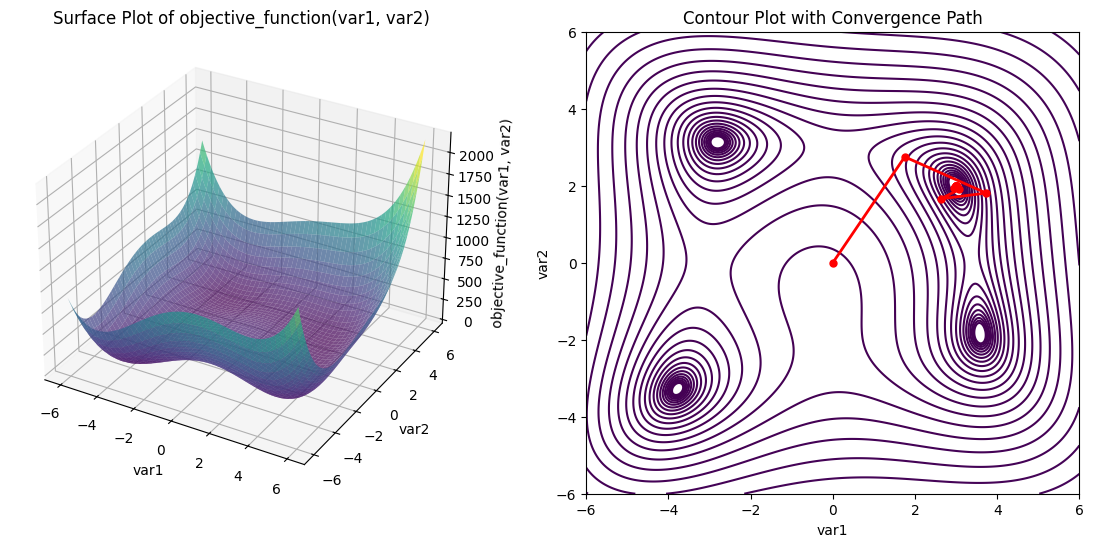

In [19]:
# Generate values for var1 and var2 (corresponding to x1 and x2) for the plot
var1_vals = np.linspace(-6, 6, 400)
var2_vals = np.linspace(-6, 6, 400)
Var1, Var2 = np.meshgrid(var1_vals, var2_vals)
# Evaluate the objective function over the grid
Objective = objective_function([Var1, Var2])

# Create a figure with two subplots
fig = plt.figure(figsize=(14, 6))

# Surface plot of the objective function
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(Var1, Var2, Objective, cmap='viridis', alpha=0.7)
ax1.set_xlabel('var1')
ax1.set_ylabel('var2')
ax1.set_zlabel('objective_function(var1, var2)')
ax1.set_title('Surface Plot of objective_function(var1, var2)')

# Contour plot of the objective function
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(Var1, Var2, Objective, levels=np.logspace(0, 5, 35), cmap='viridis')
path = np.array(path)
ax2.plot(path[:, 0], path[:, 1], 'ro-', linewidth=2, markersize=5)
ax2.set_xlabel('var1')
ax2.set_ylabel('var2')
ax2.set_title('Contour Plot with Convergence Path')

# Show the plots
plt.show()

Summary

In this notebook, we implemented the steepest descent method with a line search for optimizing a given function. We visualized the path of convergence on both surface and contour plots, demonstrating how the method iteratively finds the function's minimum.